# Supervised Machine Learning:Regression 

## Importing Libraries 

In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Loading the Dataset 

In [2]:
data=pd.read_csv(r"C:\Users\Priti\Downloads\submission\Admission_Predict.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
data.set_index("Serial No.",inplace=True) # set Serial no as index

In [4]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
data.info() # This gives the information of theb data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 8 columns):
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(4)
memory usage: 28.1 KB


In [6]:
data.isnull().sum() # to check the null values

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

# Descriptive of the dataset

In [8]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


# Data Visualisation 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of TOEFL Score')

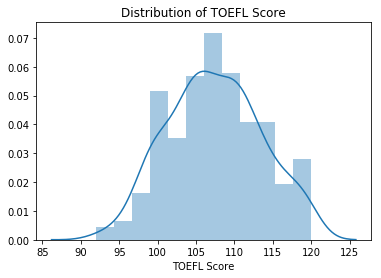

In [9]:
sns.distplot(data['TOEFL Score'])
plt.title("Distribution of TOEFL Score")

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of GRE Score')

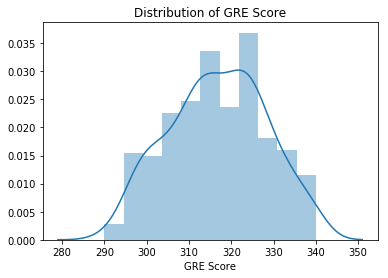

In [10]:
sns.distplot(data['GRE Score'])
plt.title("Distribution of GRE Score")

Text(0.5,1,'Count Plot ')

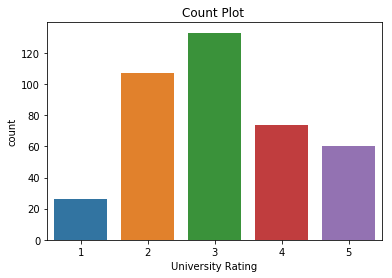

In [11]:
sns.countplot(x='University Rating',data=data)
plt.title("Count Plot ")

In [12]:
data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


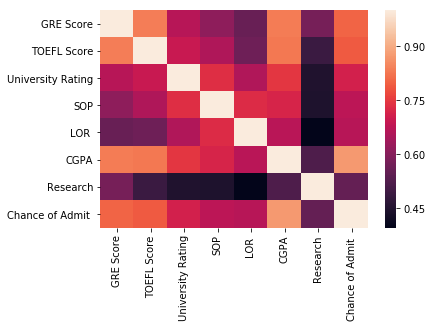

In [13]:
sns.heatmap(data.corr())

# Preparation of the data

In [14]:
x=data.iloc[0:,0:7]
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Serial No.,,,,,,,
1,337,118,4,4.5,4.5,9.65,1
2,324,107,4,4.0,4.5,8.87,1
3,316,104,3,3.0,3.5,8.00,1
4,322,110,3,3.5,2.5,8.67,1
5,314,103,2,2.0,3.0,8.21,0


In [15]:
y=data.iloc[:,7:]
y.head()

,Chance of Admit
Serial No.,
1,0.92
2,0.76
3,0.72
4,0.80
5,0.65


# Train and Test Spliting

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

# Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
pred

array([[0.50167848],
       [0.6248231 ],
       [0.64432138],
       [0.64282348],
       [0.6944492 ],
       [0.70213463],
       [0.79808242],
       [0.49063897],
       [0.85977036],
       [0.80114104],
       [0.78401777],
       [0.69797727],
       [0.88603069],
       [0.98255304],
       [0.57131272],
       [0.747547  ],
       [0.70141107],
       [0.65874174],
       [0.5057038 ],
       [0.65022342],
       [0.56365449],
       [0.65264939],
       [0.76998124],
       [0.61960894],
       [0.46333037],
       [0.80630071],
       [0.76091947],
       [0.7190662 ],
       [0.52188408],
       [0.82021175],
       [0.72652906],
       [0.68794843],
       [0.54720748],
       [0.89248885],
       [0.5234737 ],
       [0.5709845 ],
       [0.6717365 ],
       [0.58074569],
       [0.71209487],
       [0.71132015],
       [0.63380392],
       [0.84679575],
       [0.89533348],
       [0.76179222],
       [0.71702598],
       [0.9531109 ],
       [0.6250396 ],
       [0.726

In [18]:
print(lm.intercept_)

[-1.29545024]


In [19]:
lm.coef_

array([[ 0.00201167,  0.0029384 ,  0.00967927, -0.00202714,  0.01889737,
         0.11268079,  0.0184505 ]])

In [20]:
lmr2=lm.score(x_test,y_test)
lmr2

0.8001063801904396

# KNN 

In [21]:
from sklearn.neighbors import KNeighborsRegressor
knn= KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
knnr2=knn.score(x_test,y_test)
knnr2

0.6254377930073218

# Decision tree

In [22]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor(max_depth=3,min_samples_leaf=3,random_state=0)
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
dtr2=dt.score(x_test,y_test)
dtr2

0.695898644596923

# Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=10,max_depth=3,min_samples_leaf=3,random_state=0)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
rfr2=rf.score(x_test,y_test)
rfr2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.7754936066512468

# SVR

In [24]:
from sklearn.svm import SVR
svr=SVR(C=1,kernel="rbf",gamma=0.01)
svr.fit(x_train,y_train)
pred=svr.predict(x_test)
svrr2=svr.score(x_test,y_test)
svrr2

C:\Users\Priti\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.6852567561192265

In [25]:
models=['Linear Regression','KNN','Decision Tree','Random Forest','SVR']
#rows=[lmr2,knnr2,dtr2,rfr2,svrr2]
R_Squared=[0.80,0.62,0.69,0.77,0.68]

In [26]:
df=pd.DataFrame(R_Squared,models,columns=['R_Square'])
df

,R_Square
Linear Regression,0.80
KNN,0.62
Decision Tree,0.69
Random Forest,0.77
SVR,0.68
